Criando um script para automatizar a geração de arquivos PDF e elaboração de QR_Codes

# Importando as bibliotecas

In [1]:
import pandas as pd
from fpdf import FPDF
import numpy as np
import os


# Leitura do DataFrame

In [2]:
# df_python = pandas.read_excel('dados.xlsx',
#                               sheet_name='todos',
#                               usecols=['Nome', 'Jantar', 'Turma','Sala', 'Dia', 'Email'])

dados = pd.read_excel('./dados.xlsx')
dados


,N,Nome,Genero,Nascimento,Inscrição,CPF,Escola,PI,Notebook,Jantar,Turma,Dia,Sala,Professor
0,1,Isabelle de Sá Foly,F,1970-08-10,F97T3482EV5,438753688/86,PRIVATE,Colaborador,NÃO,SIM,Turma 1,Quinta-feira,P4,Grilo
1,2,Eduardo Ramos,M,1971-11-30,374G11FF1S6,487.616.658-78,PRIVATE,Aventureiro,NÃO,NÃO,Turma 1,Quinta-feira,P4,Grilo
2,3,Flávio Barbosa,M,1972-05-10,16PTLFP342I,47708667801,PRIVATE,Capitão,SIM,SIM,Turma 1,Quinta-feira,P4,Grilo
3,4,Rômulo Pedrazza,M,1973-07-23,ACVHF34SCFN,50566866897,PUBLIC,Controlador,NÃO,SIM,Turma 1,Quinta-feira,P4,Grilo
4,5,Manuela Brum,F,1973-10-09,XYGGLABQOFG,430.804.608-47,PRIVATE,Operador,SIM,SIM,Turma 1,Quinta-feira,P4,Grilo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,Matheus Matta Marques,M,1988-01-09,8GV3O565Q9F,45428688858,PUBLIC,Adaptativo,NÃO,SIM,Turma 4,Quinta-feira,P9,Daniel Neto
86,87,Lucas Martins,M,1988-01-10,NI6OFKEXDGT,408.792.148-48,PRIVATE,Colaborador,SIM,NÃO,Turma 4,Quinta-feira,P9,Daniel Neto
87,88,Breno Franklin da Silva,M,1988-01-24,QTZPLN9YL1Z,467691418-09,PRIVATE,Promotor,SIM,SIM,Turma 4,Quinta-feira,P9,Daniel Neto
88,89,Tiago de Araújo Júnior,M,1988-03-24,DSOASVDQBYZ,147.560.184-08,PUBLIC,Individualista,NÃO,SIM,Turma 4,Quinta-feira,P9,Daniel Neto


In [32]:
dados_mod = dados.copy()
dados_mod['Genero'] = np.where(dados_mod['Genero']=='F', "Feminino", "Masculino")
dados_mod


,N,Nome,Genero,Nascimento,Inscrição,CPF,Escola,PI,Notebook,Jantar,Turma,Dia,Sala,Professor
0,1,Isabelle de Sá Foly,Feminino,1970-08-10,F97T3482EV5,438753688/86,PRIVATE,Colaborador,NÃO,SIM,Turma 1,Quinta-feira,P4,Grilo
1,2,Eduardo Ramos,Masculino,1971-11-30,374G11FF1S6,487.616.658-78,PRIVATE,Aventureiro,NÃO,NÃO,Turma 1,Quinta-feira,P4,Grilo
2,3,Flávio Barbosa,Masculino,1972-05-10,16PTLFP342I,47708667801,PRIVATE,Capitão,SIM,SIM,Turma 1,Quinta-feira,P4,Grilo
3,4,Rômulo Pedrazza,Masculino,1973-07-23,ACVHF34SCFN,50566866897,PUBLIC,Controlador,NÃO,SIM,Turma 1,Quinta-feira,P4,Grilo
4,5,Manuela Brum,Feminino,1973-10-09,XYGGLABQOFG,430.804.608-47,PRIVATE,Operador,SIM,SIM,Turma 1,Quinta-feira,P4,Grilo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,Matheus Matta Marques,Masculino,1988-01-09,8GV3O565Q9F,45428688858,PUBLIC,Adaptativo,NÃO,SIM,Turma 4,Quinta-feira,P9,Daniel Neto
86,87,Lucas Martins,Masculino,1988-01-10,NI6OFKEXDGT,408.792.148-48,PRIVATE,Colaborador,SIM,NÃO,Turma 4,Quinta-feira,P9,Daniel Neto
87,88,Breno Franklin da Silva,Masculino,1988-01-24,QTZPLN9YL1Z,467691418-09,PRIVATE,Promotor,SIM,SIM,Turma 4,Quinta-feira,P9,Daniel Neto
88,89,Tiago de Araújo Júnior,Masculino,1988-03-24,DSOASVDQBYZ,147.560.184-08,PUBLIC,Individualista,NÃO,SIM,Turma 4,Quinta-feira,P9,Daniel Neto


In [33]:
from datetime import datetime

dados_mod['Idade'] = pd.Series()

hoje = datetime.now()

for i in range(len(dados_mod)):
    dados_mod['Idade'][i] = (hoje - dados_mod['Nascimento'][i]).days // 365

dados_mod['Idade'] = dados_mod['Idade'].astype('int64')
dados_mod

C:\Users\Aluno Temp\AppData\Local\Temp\ipykernel_8844\1753383617.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dados_mod['Idade'] = pd.Series()
C:\Users\Aluno Temp\AppData\Local\Temp\ipykernel_8844\1753383617.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_mod['Idade'][i] = (hoje - dados_mod['Nascimento'][i]).days // 365


,N,Nome,Genero,Nascimento,Inscrição,CPF,Escola,PI,Notebook,Jantar,Turma,Dia,Sala,Professor,Idade
0,1,Isabelle de Sá Foly,Feminino,1970-08-10,F97T3482EV5,438753688/86,PRIVATE,Colaborador,NÃO,SIM,Turma 1,Quinta-feira,P4,Grilo,53
1,2,Eduardo Ramos,Masculino,1971-11-30,374G11FF1S6,487.616.658-78,PRIVATE,Aventureiro,NÃO,NÃO,Turma 1,Quinta-feira,P4,Grilo,51
2,3,Flávio Barbosa,Masculino,1972-05-10,16PTLFP342I,47708667801,PRIVATE,Capitão,SIM,SIM,Turma 1,Quinta-feira,P4,Grilo,51
3,4,Rômulo Pedrazza,Masculino,1973-07-23,ACVHF34SCFN,50566866897,PUBLIC,Controlador,NÃO,SIM,Turma 1,Quinta-feira,P4,Grilo,50
4,5,Manuela Brum,Feminino,1973-10-09,XYGGLABQOFG,430.804.608-47,PRIVATE,Operador,SIM,SIM,Turma 1,Quinta-feira,P4,Grilo,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,Matheus Matta Marques,Masculino,1988-01-09,8GV3O565Q9F,45428688858,PUBLIC,Adaptativo,NÃO,SIM,Turma 4,Quinta-feira,P9,Daniel Neto,35
86,87,Lucas Martins,Masculino,1988-01-10,NI6OFKEXDGT,408.792.148-48,PRIVATE,Colaborador,SIM,NÃO,Turma 4,Quinta-feira,P9,Daniel Neto,35
87,88,Breno Franklin da Silva,Masculino,1988-01-24,QTZPLN9YL1Z,467691418-09,PRIVATE,Promotor,SIM,SIM,Turma 4,Quinta-feira,P9,Daniel Neto,35
88,89,Tiago de Araújo Júnior,Masculino,1988-03-24,DSOASVDQBYZ,147.560.184-08,PUBLIC,Individualista,NÃO,SIM,Turma 4,Quinta-feira,P9,Daniel Neto,35


In [34]:
dados_modificado = dados.copy()
dados_modificado['Genero'] = np.where(dados_modificado['Genero']=='F',"Feminino", "Masculino")
dados_modificado

,N,Nome,Genero,Nascimento,Inscrição,CPF,Escola,PI,Notebook,Jantar,Turma,Dia,Sala,Professor
0,1,Isabelle de Sá Foly,Feminino,1970-08-10,F97T3482EV5,438753688/86,PRIVATE,Colaborador,NÃO,SIM,Turma 1,Quinta-feira,P4,Grilo
1,2,Eduardo Ramos,Masculino,1971-11-30,374G11FF1S6,487.616.658-78,PRIVATE,Aventureiro,NÃO,NÃO,Turma 1,Quinta-feira,P4,Grilo
2,3,Flávio Barbosa,Masculino,1972-05-10,16PTLFP342I,47708667801,PRIVATE,Capitão,SIM,SIM,Turma 1,Quinta-feira,P4,Grilo
3,4,Rômulo Pedrazza,Masculino,1973-07-23,ACVHF34SCFN,50566866897,PUBLIC,Controlador,NÃO,SIM,Turma 1,Quinta-feira,P4,Grilo
4,5,Manuela Brum,Feminino,1973-10-09,XYGGLABQOFG,430.804.608-47,PRIVATE,Operador,SIM,SIM,Turma 1,Quinta-feira,P4,Grilo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,Matheus Matta Marques,Masculino,1988-01-09,8GV3O565Q9F,45428688858,PUBLIC,Adaptativo,NÃO,SIM,Turma 4,Quinta-feira,P9,Daniel Neto
86,87,Lucas Martins,Masculino,1988-01-10,NI6OFKEXDGT,408.792.148-48,PRIVATE,Colaborador,SIM,NÃO,Turma 4,Quinta-feira,P9,Daniel Neto
87,88,Breno Franklin da Silva,Masculino,1988-01-24,QTZPLN9YL1Z,467691418-09,PRIVATE,Promotor,SIM,SIM,Turma 4,Quinta-feira,P9,Daniel Neto
88,89,Tiago de Araújo Júnior,Masculino,1988-03-24,DSOASVDQBYZ,147.560.184-08,PUBLIC,Individualista,NÃO,SIM,Turma 4,Quinta-feira,P9,Daniel Neto


In [35]:
from datetime import datetime

hoje = datetime.now()

dados_modificado['Idade'] = pd.Series()

for i in range(len(dados_modificado)):
    dados_modificado['Idade'][i] = (hoje - dados_modificado['Nascimento'][i]).days // 365

dados_modificado['Idade'] = dados_modificado['Idade'].astype('Int64')
dados_modificado


C:\Users\Aluno Temp\AppData\Local\Temp\ipykernel_8844\2884142444.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dados_modificado['Idade'] = pd.Series()
C:\Users\Aluno Temp\AppData\Local\Temp\ipykernel_8844\2884142444.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_modificado['Idade'][i] = (hoje - dados_modificado['Nascimento'][i]).days // 365


,N,Nome,Genero,Nascimento,Inscrição,CPF,Escola,PI,Notebook,Jantar,Turma,Dia,Sala,Professor,Idade
0,1,Isabelle de Sá Foly,Feminino,1970-08-10,F97T3482EV5,438753688/86,PRIVATE,Colaborador,NÃO,SIM,Turma 1,Quinta-feira,P4,Grilo,53
1,2,Eduardo Ramos,Masculino,1971-11-30,374G11FF1S6,487.616.658-78,PRIVATE,Aventureiro,NÃO,NÃO,Turma 1,Quinta-feira,P4,Grilo,51
2,3,Flávio Barbosa,Masculino,1972-05-10,16PTLFP342I,47708667801,PRIVATE,Capitão,SIM,SIM,Turma 1,Quinta-feira,P4,Grilo,51
3,4,Rômulo Pedrazza,Masculino,1973-07-23,ACVHF34SCFN,50566866897,PUBLIC,Controlador,NÃO,SIM,Turma 1,Quinta-feira,P4,Grilo,50
4,5,Manuela Brum,Feminino,1973-10-09,XYGGLABQOFG,430.804.608-47,PRIVATE,Operador,SIM,SIM,Turma 1,Quinta-feira,P4,Grilo,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,Matheus Matta Marques,Masculino,1988-01-09,8GV3O565Q9F,45428688858,PUBLIC,Adaptativo,NÃO,SIM,Turma 4,Quinta-feira,P9,Daniel Neto,35
86,87,Lucas Martins,Masculino,1988-01-10,NI6OFKEXDGT,408.792.148-48,PRIVATE,Colaborador,SIM,NÃO,Turma 4,Quinta-feira,P9,Daniel Neto,35
87,88,Breno Franklin da Silva,Masculino,1988-01-24,QTZPLN9YL1Z,467691418-09,PRIVATE,Promotor,SIM,SIM,Turma 4,Quinta-feira,P9,Daniel Neto,35
88,89,Tiago de Araújo Júnior,Masculino,1988-03-24,DSOASVDQBYZ,147.560.184-08,PUBLIC,Individualista,NÃO,SIM,Turma 4,Quinta-feira,P9,Daniel Neto,35


# Manipulando (editando) o DataFrame

In [36]:
#Colocar o nome correto na coluna Genero

dados_org = dados.copy()
dados_org['Genero'] = np.where(dados['Genero']=='F','Feminino','Masculino')
dados_org.drop(columns="N", inplace=True)
dados_org

,Nome,Genero,Nascimento,Inscrição,CPF,Escola,PI,Notebook,Jantar,Turma,Dia,Sala,Professor
0,Isabelle de Sá Foly,Feminino,1970-08-10,F97T3482EV5,438753688/86,PRIVATE,Colaborador,NÃO,SIM,Turma 1,Quinta-feira,P4,Grilo
1,Eduardo Ramos,Masculino,1971-11-30,374G11FF1S6,487.616.658-78,PRIVATE,Aventureiro,NÃO,NÃO,Turma 1,Quinta-feira,P4,Grilo
2,Flávio Barbosa,Masculino,1972-05-10,16PTLFP342I,47708667801,PRIVATE,Capitão,SIM,SIM,Turma 1,Quinta-feira,P4,Grilo
3,Rômulo Pedrazza,Masculino,1973-07-23,ACVHF34SCFN,50566866897,PUBLIC,Controlador,NÃO,SIM,Turma 1,Quinta-feira,P4,Grilo
4,Manuela Brum,Feminino,1973-10-09,XYGGLABQOFG,430.804.608-47,PRIVATE,Operador,SIM,SIM,Turma 1,Quinta-feira,P4,Grilo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Matheus Matta Marques,Masculino,1988-01-09,8GV3O565Q9F,45428688858,PUBLIC,Adaptativo,NÃO,SIM,Turma 4,Quinta-feira,P9,Daniel Neto
86,Lucas Martins,Masculino,1988-01-10,NI6OFKEXDGT,408.792.148-48,PRIVATE,Colaborador,SIM,NÃO,Turma 4,Quinta-feira,P9,Daniel Neto
87,Breno Franklin da Silva,Masculino,1988-01-24,QTZPLN9YL1Z,467691418-09,PRIVATE,Promotor,SIM,SIM,Turma 4,Quinta-feira,P9,Daniel Neto
88,Tiago de Araújo Júnior,Masculino,1988-03-24,DSOASVDQBYZ,147.560.184-08,PUBLIC,Individualista,NÃO,SIM,Turma 4,Quinta-feira,P9,Daniel Neto


In [37]:
#Calculando a Idade pela coluna do tipo Data

from datetime import datetime
hoje = datetime.now()

# dados_org['Idade'] = dados_org['Nascimento'].apply(lambda x: (hoje - x).days // 365)
# dados_org
for i in range(len(dados_org)):
    dados_org['Idade'] = (hoje - dados_org['Nascimento']).dt.days // 365

dados_org

,Nome,Genero,Nascimento,Inscrição,CPF,Escola,PI,Notebook,Jantar,Turma,Dia,Sala,Professor,Idade
0,Isabelle de Sá Foly,Feminino,1970-08-10,F97T3482EV5,438753688/86,PRIVATE,Colaborador,NÃO,SIM,Turma 1,Quinta-feira,P4,Grilo,53
1,Eduardo Ramos,Masculino,1971-11-30,374G11FF1S6,487.616.658-78,PRIVATE,Aventureiro,NÃO,NÃO,Turma 1,Quinta-feira,P4,Grilo,51
2,Flávio Barbosa,Masculino,1972-05-10,16PTLFP342I,47708667801,PRIVATE,Capitão,SIM,SIM,Turma 1,Quinta-feira,P4,Grilo,51
3,Rômulo Pedrazza,Masculino,1973-07-23,ACVHF34SCFN,50566866897,PUBLIC,Controlador,NÃO,SIM,Turma 1,Quinta-feira,P4,Grilo,50
4,Manuela Brum,Feminino,1973-10-09,XYGGLABQOFG,430.804.608-47,PRIVATE,Operador,SIM,SIM,Turma 1,Quinta-feira,P4,Grilo,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Matheus Matta Marques,Masculino,1988-01-09,8GV3O565Q9F,45428688858,PUBLIC,Adaptativo,NÃO,SIM,Turma 4,Quinta-feira,P9,Daniel Neto,35
86,Lucas Martins,Masculino,1988-01-10,NI6OFKEXDGT,408.792.148-48,PRIVATE,Colaborador,SIM,NÃO,Turma 4,Quinta-feira,P9,Daniel Neto,35
87,Breno Franklin da Silva,Masculino,1988-01-24,QTZPLN9YL1Z,467691418-09,PRIVATE,Promotor,SIM,SIM,Turma 4,Quinta-feira,P9,Daniel Neto,35
88,Tiago de Araújo Júnior,Masculino,1988-03-24,DSOASVDQBYZ,147.560.184-08,PUBLIC,Individualista,NÃO,SIM,Turma 4,Quinta-feira,P9,Daniel Neto,35


In [38]:
# criando uma função para gerar um e-mail a partir do primeiro e último nome
def gerar_email(nome):
    texto = nome.split()
    primeiro = texto[0]
    ultimo = texto[len(texto)-1]
    return (primeiro+'.'+ultimo+'@germinare.org.br').lower() 

print(gerar_email ('Marcelo Grilo Junior'))    

marcelo.junior@germinare.org.br


In [39]:
dados_mod['Email'] = pd.Series()

for i in range(len(dados_mod)):
    dados_mod['Email'][i] = gerar_email(dados_mod['Nome'][i]) 

# dados_mod.drop(columns='N', inplace=True)
dados_mod


C:\Users\Aluno Temp\AppData\Local\Temp\ipykernel_8844\3123873716.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dados_mod['Email'] = pd.Series()
C:\Users\Aluno Temp\AppData\Local\Temp\ipykernel_8844\3123873716.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_mod['Email'][i] = gerar_email(dados_mod['Nome'][i])


,N,Nome,Genero,Nascimento,Inscrição,CPF,Escola,PI,Notebook,Jantar,Turma,Dia,Sala,Professor,Idade,Email
0,1,Isabelle de Sá Foly,Feminino,1970-08-10,F97T3482EV5,438753688/86,PRIVATE,Colaborador,NÃO,SIM,Turma 1,Quinta-feira,P4,Grilo,53,isabelle.foly@germinare.org.br
1,2,Eduardo Ramos,Masculino,1971-11-30,374G11FF1S6,487.616.658-78,PRIVATE,Aventureiro,NÃO,NÃO,Turma 1,Quinta-feira,P4,Grilo,51,eduardo.ramos@germinare.org.br
2,3,Flávio Barbosa,Masculino,1972-05-10,16PTLFP342I,47708667801,PRIVATE,Capitão,SIM,SIM,Turma 1,Quinta-feira,P4,Grilo,51,flávio.barbosa@germinare.org.br
3,4,Rômulo Pedrazza,Masculino,1973-07-23,ACVHF34SCFN,50566866897,PUBLIC,Controlador,NÃO,SIM,Turma 1,Quinta-feira,P4,Grilo,50,rômulo.pedrazza@germinare.org.br
4,5,Manuela Brum,Feminino,1973-10-09,XYGGLABQOFG,430.804.608-47,PRIVATE,Operador,SIM,SIM,Turma 1,Quinta-feira,P4,Grilo,49,manuela.brum@germinare.org.br
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,Matheus Matta Marques,Masculino,1988-01-09,8GV3O565Q9F,45428688858,PUBLIC,Adaptativo,NÃO,SIM,Turma 4,Quinta-feira,P9,Daniel Neto,35,matheus.marques@germinare.org.br
86,87,Lucas Martins,Masculino,1988-01-10,NI6OFKEXDGT,408.792.148-48,PRIVATE,Colaborador,SIM,NÃO,Turma 4,Quinta-feira,P9,Daniel Neto,35,lucas.martins@germinare.org.br
87,88,Breno Franklin da Silva,Masculino,1988-01-24,QTZPLN9YL1Z,467691418-09,PRIVATE,Promotor,SIM,SIM,Turma 4,Quinta-feira,P9,Daniel Neto,35,breno.silva@germinare.org.br
88,89,Tiago de Araújo Júnior,Masculino,1988-03-24,DSOASVDQBYZ,147.560.184-08,PUBLIC,Individualista,NÃO,SIM,Turma 4,Quinta-feira,P9,Daniel Neto,35,tiago.júnior@germinare.org.br


In [40]:
dados_mod['URL'] = pd.Series()

for i in range(len(dados_mod)):
    dados_mod['URL'][i] = f'https://germinatech.github.io/arquivos_pdf/{df_qr["Nome"][i].replace(" ", "_")}/{df_qr["Nome"][i].replace(" ", "_")}.pdf'

dados_mod['URL']


C:\Users\Aluno Temp\AppData\Local\Temp\ipykernel_8844\3107848066.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dados_mod['URL'] = pd.Series()
C:\Users\Aluno Temp\AppData\Local\Temp\ipykernel_8844\3107848066.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_mod['URL'][i] = f'https://germinatech.github.io/arquivos_pdf/{df_qr["Nome"][i].replace(" ", "_")}/{df_qr["Nome"][i].replace(" ", "_")}.pdf'


0     https://germinatech.github.io/arquivos_pdf/Isa...
1     https://germinatech.github.io/arquivos_pdf/Edu...
2     https://germinatech.github.io/arquivos_pdf/Flá...
3     https://germinatech.github.io/arquivos_pdf/Rôm...
4     https://germinatech.github.io/arquivos_pdf/Man...
                            ...                        
85    https://germinatech.github.io/arquivos_pdf/Mat...
86    https://germinatech.github.io/arquivos_pdf/Luc...
87    https://germinatech.github.io/arquivos_pdf/Bre...
88    https://germinatech.github.io/arquivos_pdf/Tia...
89    https://germinatech.github.io/arquivos_pdf/Joã...
Name: URL, Length: 90, dtype: object

In [41]:
#exportar para um xlsx

dados_mod.to_excel("finalizado.xlsx", index=False)

Gerar os PDFs

In [42]:
# base_pdf = dados_org.copy()
base_pdf = pd.read_excel('finalizado.xlsx',
                              usecols=['Nome', 'Idade', 'Jantar', 'Turma','Sala', 'Dia', 'Email'])

# for i in range(len(base_pdf)):
for i in range(len(base_pdf)):

    X = (f"Nome: {base_pdf['Nome'][i]}",
    f"Idade: {base_pdf['Idade'][i]} anos", 
    f"Vai Jantar? {base_pdf['Jantar'][i]}", 
    f"Turma: {base_pdf['Turma'][i]}", 
    f"Sala: {base_pdf['Sala'][i]}", 
    f"Dia: {base_pdf['Dia'][i]}",
    f"Email: {base_pdf['Email'][i]}")

    name = base_pdf['Nome'][i]
    name_format = name.replace(" ", "_")
    
    folder = os.path.join("arquivos_pdf/", name_format)
    # print(folder)
    os.mkdir(folder)

    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=20)

    for j in range(len(X)):
        pdf.cell(300, 10, txt=str(X[j]), ln=3, align='L')
    pdf.output(f"{folder}\{name_format}.pdf")


FileExistsError: [WinError 183] Não é possível criar um arquivo já existente: 'arquivos_pdf/Isabelle_de_Sá_Foly'

Gerar os QRCodes

In [5]:
import qrcode

df_qr = pd.read_excel('finalizado.xlsx',
                              usecols=['Inscrição','Nome', 'Jantar', 'Sala', 'Dia', 'Idade', 'Email'])

# for i in range(len(df_qr)):
for i in range(len(df_qr)):
    link = f'https://germinatech.github.io/qr_codes_admissao2024/{df_qr["Inscrição"][i].replace(" ", "_")}/{df_qr["Inscrição"][i].replace(" ", "_")}.html'
    qrimg = qrcode.make(link)
    qrimg.save(f'qrCodes/{df_qr["Inscrição"][i].replace(" ", "_")}.png')

In [ ]:
link = f'https://germinatech.github.io/arquivos_pdf/Alfredo_Machado_Araujo.png'
qrimg = qrcode.make(link)
qrimg.save(f'teste.png')

# Enviando pro whatsapp

In [11]:
from selenium import webrdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

ImportError: cannot import name 'webrdriver' from 'selenium' (c:\Users\Aluno Temp\anaconda3\lib\site-packages\selenium\__init__.py)

# Gerar gráfico por Gênero e PI

In [ ]:
import matplotlib.pyplot as plt

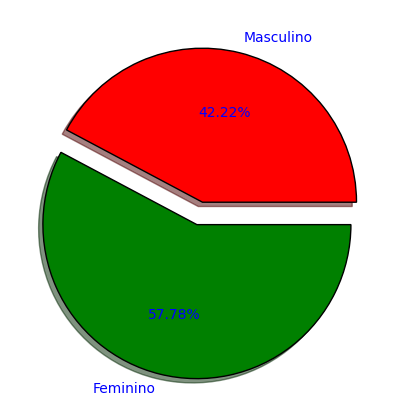

In [ ]:
masc = dados_org['Genero'][dados_org['Genero']=='Masculino'].count()
fem = dados_org['Genero'][dados_org['Genero']=='Feminino'].count()
valores = [masc, fem]
labels = ['Masculino', 'Feminino']
plt.figure(figsize=(10,5))
plt.pie(x=valores, 
        colors=['red','green'], 
        labels=['Masculino','Feminino'], 
        autopct='%.2f%%',
        textprops={'color':'blue'},
        explode=[0,0.15],
        shadow=True,
        wedgeprops={'linewidth':1,'edgecolor':'black'}
        )
plt.show()


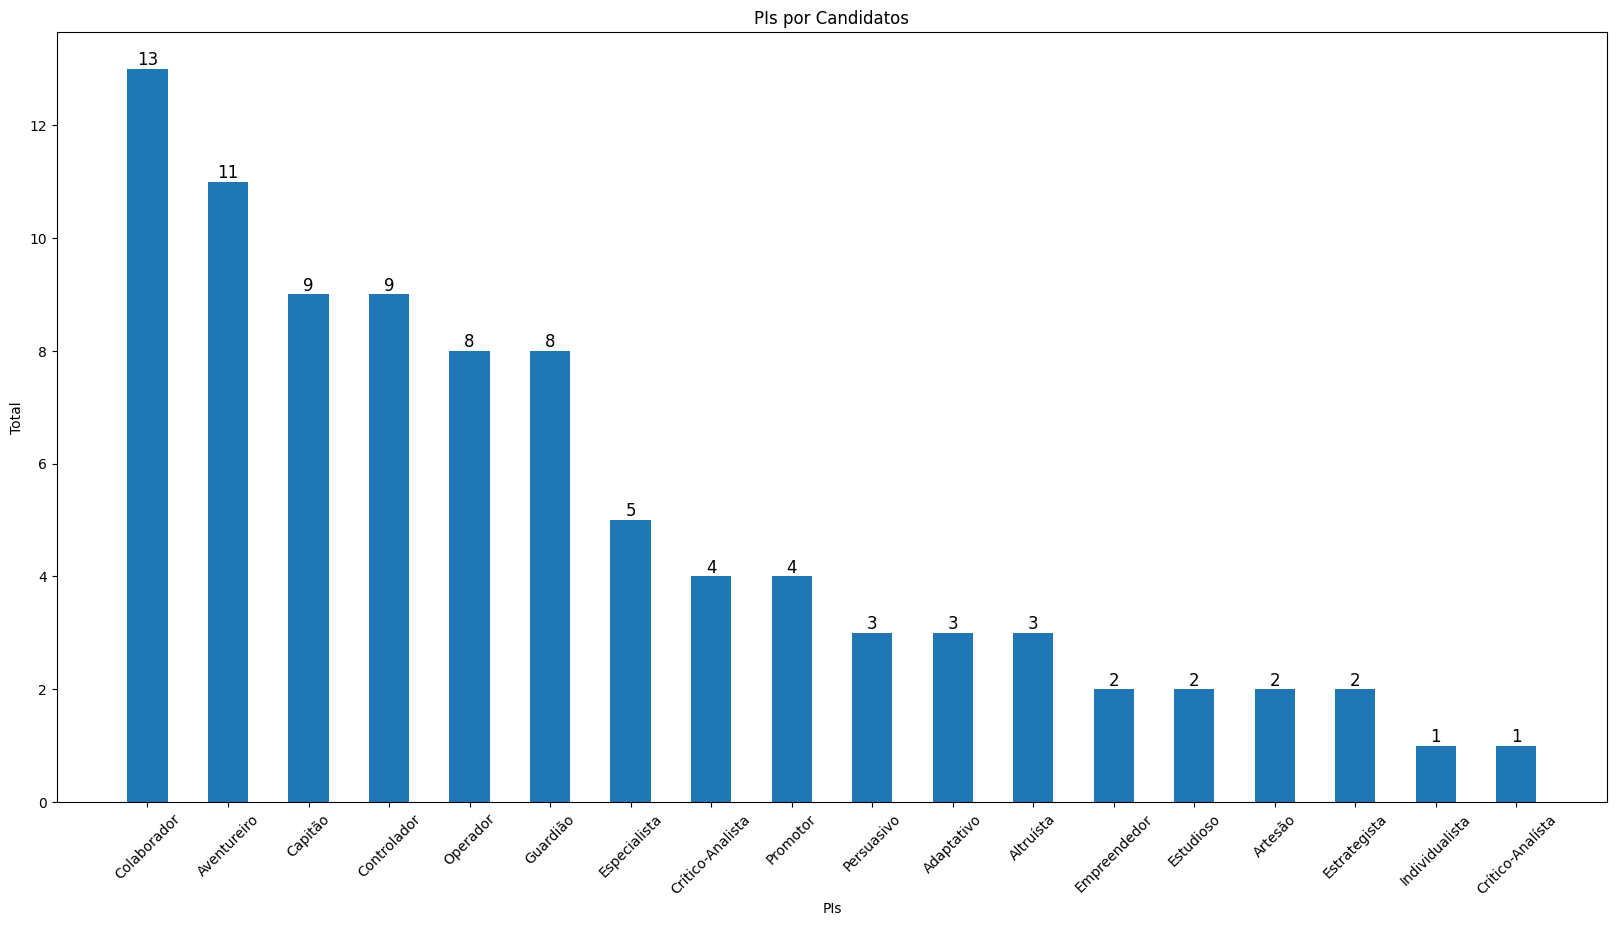

In [ ]:

dados_graf = dados_org.groupby("PI")['Nome'].count().sort_values(ascending=False)  # Ordena os dados pela contagem em ordem decrescente

plt.figure(figsize=(20,10))
# plt.bar(cinco_mais['Município'], cinco_mais['Mun_Total de casos'])
grafico = plt.bar(x=dados_org['PI'].unique() ,height=dados_graf, width=0.5)

plt.bar_label(grafico, 
              fmt="%.0f", 
              size=12)

plt.xlabel('PIs')
plt.xticks(rotation=45)
plt.ylabel('Total')
plt.title('PIs por Candidatos')
plt.savefig('Graficos_pi.png', format='png')
plt.show()


# Enviando mensagem com os gráficos por whatsapp

In [ ]:
#bibliotecas que podemos usar
import webbrowser as wb # biblioteca para acessar um site e fazer uma ação
import pywhatkit as zap # biblioteca para automatizar mensagens pelo whatsapp
# from pandas.io.formats.format import TextAdjustment 
import pyautogui as auto # biblioteca para automação de comandos
import time 

In [ ]:
#Digamos que a planilha tenha o telefone dos alunos em uma coluna

arquivo = './finalizado.xlsx'
#formação do dataframe 'dados' necessário ajustar nome do arquivo e planilha
dados_zap = pd.read_excel (arquivo)
#adicionando um numero aleatorio
from random import randint
dados_zap['telefone'] = pd.Series()
for i in range(len(dados_zap)):
    dados_zap['telefone'][i] = str(randint(11911112222, 11999999999))

nomeAlunos = dados_zap["Nome"] #vetor para coluna Nome
telefone = dados_zap["telefone"] #vetor para coluna telefone
mensagem = "Oi Tudo bom?"


for i in range(2): #percorre até tamanho da lista de alunos
    #abre link do whatsapp web concatenado com telefone, nome e mensagem
    # A linha abaixo manda pelo PywhatKIT (sendwhatmsg function)
    # os ultimos parametros da funcao abaixo sao: hora, minutos.
    #zap.sendwhatmsg("+55"+str(telefone[i]), mensagem[i], 12, 33)
    # zap.sendwhatmsg_instantly(
    #         phone_no='+', 
    #         message=mensagem,
    #     )
    # A linha abaixo manda pelo webbrowser (precisa ter, ou o whatsapp instalado na maquina(API) ou logado no whatsappweb)
    #wb.open('https://api.whatsapp.com/send/?phone=+55'+str(telefone[i])+'&text='+nomeAlunos[i]+', '+mensagem[i])
    # wb.open('https://web.whatsapp.com/send/?phone=+55'+str(telefone[i])+'&text='+nomeAlunos[i]+', '+mensagem)
    zap.sendwhats_image(receiver="+", img_path='C:\\Users\\Marcelo Grilo\\OneDrive - Instituto Germinare\\Área de Trabalho\\GTech\\ADD_local\\Aula_automacao\\Codes\\Graficos_pi.png')
    time.sleep(5)#pausa para dar tempo de abrir o whatsapp web, necessário ajustar conforme a velocidade do computador
    auto.press("enter") #tecla enter na mensagem já dentro do whatsapp web
    time.sleep(5.5)
    i+=1

C:\Users\Marcelo Grilo\AppData\Local\Temp\ipykernel_9988\773157846.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dados_zap['telefone'] = pd.Series()
C:\Users\Marcelo Grilo\AppData\Local\Temp\ipykernel_9988\773157846.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_zap['telefone'][i] = str(randint(11911112222, 11999999999))


In [ ]:
import pandas as pd
from pivottablejs import pivot_ui


In [ ]:
df = pd.read_excel('./finalizado.xlsx')
df['Genero'].value_counts()
df.tail(1)

,N,Nome,Genero,Nascimento,Inscrição,CPF,Escola,PI,Notebook,Jantar,Turma,Dia,Sala,Professor,Idade,Email
89,90,João Monteiro,Masculino,1988-04-26,OZWVT7H19F7,23347167821,PRIVATE,Operador,SIM,SIM,Turma 4,Quinta-feira,P9,Daniel Neto,35,joão.monteiro@germinare.org.br


In [ ]:
pivot_ui(df)